In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier  # for classification
from sklearn.metrics import accuracy_score           # for classification


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Verizon_data = '/content/drive/MyDrive/Verizon/Telco_Churn_Data.csv'

df = pd.read_csv(Verizon_data)

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Get statistics for columns
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7042,7040,7042,7041,...,7041,7041,7040,7043,7041,7042,7041,7042.000000,7042,7042
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,4,2,4,NaN,6530,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6360,3388,3095,3498,...,3094,3472,2808,2785,3870,4170,2364,NaN,11,5173
mean,NaN,NaN,0.162147,NaN,NaN,32.683516,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.756774,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,28.998589,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.089352,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,-50.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [7]:
# Checking for null values
df.isnull().values.any()

True

In [8]:
# Checking what columns are missing values
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        1
MultipleLines       3
InternetService     1
OnlineSecurity      2
OnlineBackup        0
DeviceProtection    2
TechSupport         2
StreamingTV         3
StreamingMovies     0
Contract            2
PaperlessBilling    1
PaymentMethod       2
MonthlyCharges      1
TotalCharges        1
Churn               1
dtype: int64

In [9]:
# Finding indicies with missing row values
bool_df = df.isnull()
row_has_nan = bool_df.any (axis=1)
rows_with_nan = df[row_has_nan].index
rows_with_nan

Int64Index([1375, 1397, 1401, 1411, 1417, 3995, 4666, 4668, 4670, 6239], dtype='int64')

In [10]:
# Dropping those rows
df = df.drop(df.index[rows_with_nan])

In [11]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# Checking results of previous code
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# New shape!
df.shape

(7033, 21)

In [14]:
# Testing what one hot encoding each column will do...we get over 10,000 columns
pd.get_dummies(df).shape

(7033, 13601)

In [15]:
# Convert column to either yes or no
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service': 'No'})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service': 'No'})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service': 'No'})
df['TechSupport'] = df['TechSupport'].replace({'No internet service': 'No'})
df['StreamingTV'] = df['StreamingTV'].replace({'No internet service': 'No'})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service': 'No'})
df['InternetService'] = df['InternetService'].replace({'DSL': 'Yes', 'Fiber optic' : 'Yes'})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Bank transfer (automatic)': 'Yes', 'Credit card (automatic)' : 'Yes', 'Electronic check' : 'No', 'Mailed check' : 'No'})
# Renaming Payment Method to Automatic Payment (1)
df = df.rename(columns={'PaymentMethod': 'AutomaticPayment'})

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,AutomaticPayment,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,No,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,Yes,...,Yes,No,No,No,One year,No,No,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,No,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,Yes,Yes,...,Yes,Yes,No,No,One year,No,Yes,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,No,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,No,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Yes,No,...,Yes,No,Yes,Yes,One year,Yes,Yes,103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,No,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Yes,No,...,No,No,No,No,Month-to-month,Yes,No,74.40,306.6,Yes


In [16]:
# Male 1 and Female 0
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
# Yes 1 and No 0
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})
df['MultipleLines'] = df['MultipleLines'].replace({'Yes': 1, 'No': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes': 1, 'No': 0})
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No': 0})
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 1, 'No': 0})
df['InternetService'] = df['InternetService'].replace({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
df['AutomaticPayment'] = df['AutomaticPayment'].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,AutomaticPayment,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,Month-to-month,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,0,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,One year,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,1,1,1,1,One year,1,0,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,1,1,0,...,1,0,1,1,One year,1,1,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,1,...,0,0,0,0,Month-to-month,1,0,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,1,0,...,0,0,0,0,Month-to-month,1,0,74.40,306.6,1


In [17]:
# Checking how our data types look
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
AutomaticPayment      int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [18]:
# CONTRACT

In [19]:
# Checking how many unique values in column (there are three important values)
unique_values = df['Contract'].unique()
value_counts = df['Contract'].value_counts()

print(unique_values, value_counts)

['Month-to-month' 'One year' 'Two year' '1'] Month-to-month    3864
Two year          1693
One year          1472
1                    4
Name: Contract, dtype: int64


In [20]:
#Group 1 and "One year" together
df['Contract'] = df['Contract'].replace({"1": "One year"})

In [21]:
# one hot encoding columns
df = pd.get_dummies(df, columns=['Contract'])
df.shape

(7033, 23)

In [22]:
# Checking new dtypes!
df.dtypes

customerID                  object
gender                       int64
SeniorCitizen                int64
Partner                      int64
Dependents                   int64
tenure                       int64
PhoneService                 int64
MultipleLines                int64
InternetService              int64
OnlineSecurity               int64
OnlineBackup                 int64
DeviceProtection             int64
TechSupport                  int64
StreamingTV                  int64
StreamingMovies              int64
PaperlessBilling             int64
AutomaticPayment             int64
MonthlyCharges             float64
TotalCharges                object
Churn                        int64
Contract_Month-to-month      uint8
Contract_One year            uint8
Contract_Two year            uint8
dtype: object

In [23]:
# TENURE

In [24]:
# inspecting tenure
unique_values = df['tenure'].unique()
value_counts = df['tenure'].value_counts()

print(unique_values, value_counts)

[   1   34    2   45    8   22   10   28   62   13   16   58   49   25
   69   52   71   21   12   30   47   72   17   27    5   46   11   70
   63   43   15   60   18   66    9    3   31   50   64   56    7   42
   35   48   29   65   38   68   32   55   37   36   41    6    4   33
   67   23   57   61   14   20   53   40   59   24   44   19   54   51
   26    0   39 1000  300  -50  500  700]  1       613
 72      361
 2       237
 3       200
 4       174
        ... 
 1000      1
 300       1
-50        1
 500       1
 700       1
Name: tenure, Length: 78, dtype: int64


In [25]:
# Statistics on Total Charges
maximum_T = df['tenure'].max()
minimum_T = df['tenure'].min()
data_range_T = maximum_T - minimum_T
average_T = df['tenure'].mean()
std_deviation_T = df['tenure'].std()
print(f"Maximum: {maximum_T}")
print(f"Minimum: {minimum_T}")
print(f"Range: {data_range_T}")
print(f"Average: {average_T}")
print(f"Standard Deviation: {std_deviation_T}")

Maximum: 1000
Minimum: -50
Range: 1050
Average: 32.69202331864069
Standard Deviation: 29.00777847338151


In [26]:
# Checking if the disparity in tenure is corrolated to monthly contracts
comp_columns = df[['tenure', 'Contract_Month-to-month']]
comp_columns

,tenure,Contract_Month-to-month
0,1,1
1,34,0
2,2,1
3,45,0
4,2,1
...,...,...
7038,24,0
7039,72,0
7040,11,1
7041,4,1


In [27]:
# Checking how many columns are higher than 120
threshold = 120
selected_rows = df[df['tenure'] > threshold]
selected_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,PaperlessBilling,AutomaticPayment,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
1482,9290-SHCMB,0,1,0,0,1000,1,0,1,0,...,1,1,1,0,96.85,1235.55,0,1,0,0
1604,6265-SXWBU,1,0,1,1,300,1,1,1,0,...,1,0,0,1,95.75,6511.25,0,0,1,0
4612,6723-CEGQI,0,0,0,1,500,0,0,1,0,...,1,0,0,0,45.25,2933.95,0,0,0,1
5904,9402-CXWPL,0,0,0,0,700,1,1,1,0,...,1,1,0,0,98.90,6838.6,0,0,1,0


In [28]:
# scaling tenure between 12 and 140
tenure_min = 12
tenure_max = 120
scaler = MinMaxScaler(feature_range=(tenure_min, tenure_max))

df['scaledtenure'] = scaler.fit_transform(df[['tenure']])

print("Original DataFrame:")
print(df['tenure'])

print("\nScaled DataFrame:")
print(df['scaledtenure'])

Original DataFrame:
0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7033, dtype: int64

Scaled DataFrame:
0       17.245714
1       20.640000
2       17.348571
3       21.771429
4       17.348571
          ...    
7038    19.611429
7039    24.548571
7040    18.274286
7041    17.554286
7042    23.931429
Name: scaledtenure, Length: 7033, dtype: float64


In [29]:
# Statistics on scaled tenure
maximum_ST = df['scaledtenure'].max()
minimum_ST = df['scaledtenure'].min()
data_range_ST = maximum_ST - minimum_ST
average_ST = df['scaledtenure'].mean()
std_deviation_ST = df['scaledtenure'].std()
print(f"Maximum: {maximum_ST}")
print(f"Minimum: {minimum_ST}")
print(f"Range: {data_range_ST}")
print(f"Average: {average_ST}")
print(f"Standard Deviation: {std_deviation_ST}")

Maximum: 120.0
Minimum: 12.0
Range: 108.0
Average: 20.505465255631616
Standard Deviation: 2.983657214404955


In [30]:
# inspecting scaled tenure as an integer (numbers are very low and lots of disparity)
unique_values = df['scaledtenure'].unique()
value_counts = df['scaledtenure'].value_counts()

print(unique_values, value_counts)

[ 17.24571429  20.64        17.34857143  21.77142857  17.96571429
  19.40571429  18.17142857  20.02285714  23.52        18.48
  18.78857143  23.10857143  22.18285714  19.71428571  24.24
  22.49142857  24.44571429  19.30285714  18.37714286  20.22857143
  21.97714286  24.54857143  18.89142857  19.92        17.65714286
  21.87428571  18.27428571  24.34285714  23.62285714  21.56571429
  18.68571429  23.31428571  18.99428571  23.93142857  18.06857143
  17.45142857  20.33142857  22.28571429  23.72571429  22.90285714
  17.86285714  21.46285714  20.74285714  22.08        20.12571429
  23.82857143  21.05142857  24.13714286  20.43428571  22.8
  20.94857143  20.84571429  21.36        17.76        17.55428571
  20.53714286  24.03428571  19.50857143  23.00571429  23.41714286
  18.58285714  19.2         22.59428571  21.25714286  23.21142857
  19.61142857  21.66857143  19.09714286  22.69714286  22.38857143
  19.81714286  17.14285714  21.15428571 120.          48.
  12.          68.57142857  89.142857

In [31]:
# Converting scaled tenure to integer
# df['scaledtenure'] = df['scaledtenure'].astype(int)

In [32]:
# MONTHLY CHARGES

In [33]:
# Inspecting monthly charges
unique_values = df['MonthlyCharges'].unique()
value_counts = df['MonthlyCharges'].value_counts()

print(unique_values, value_counts)

[29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 20.05     61
19.90     44
19.95     44
19.85     44
19.70     43
          ..
23.65      1
114.70     1
87.80      1
43.65      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64


In [34]:
# Inspecting monthly charges
unique_values = df['Churn'].unique()
value_counts = df['Churn'].value_counts()

print(unique_values, value_counts)

[0 1] 0    5166
1    1867
Name: Churn, dtype: int64


In [35]:
# Statistics on Monthly Charges
maximum_MC = df['MonthlyCharges'].max()
minimum_MC = df['MonthlyCharges'].min()
data_range_MC = maximum_MC - minimum_MC
average_MC = df['MonthlyCharges'].mean()
std_deviation_MC = df['MonthlyCharges'].std()
print(f"Maximum: {maximum_MC}")
print(f"Minimum: {minimum_MC}")
print(f"Range: {data_range_MC}")
print(f"Average: {average_MC}")
print(f"Standard Deviation: {std_deviation_MC}")

Maximum: 118.75
Minimum: 18.25
Range: 100.5
Average: 64.76227072373098
Standard Deviation: 30.089196044052716


In [36]:
# These statistics look alright! Once we start modeling we may have to penalize some of the higher values
# using regularization techniques!

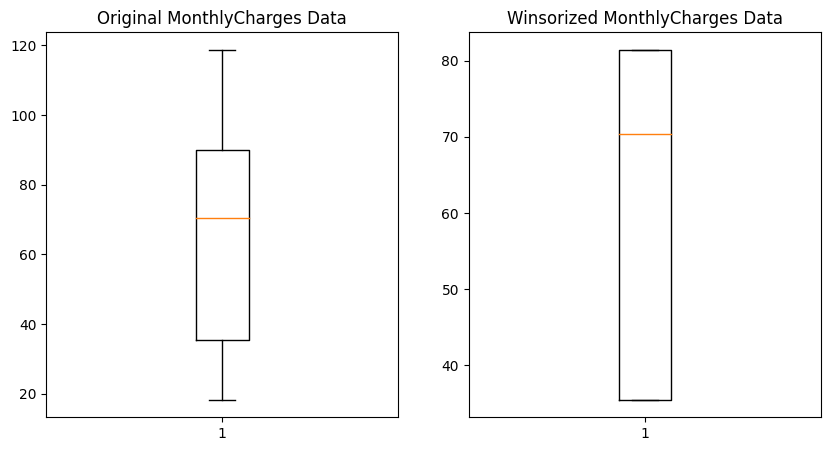

Original Monthly Charges Data Summary Statistics:
 count    7033.000000
mean       64.762271
std        30.089196
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Winsorized Monthly Charges Data Summary Statistics:
 count    7033.000000
mean       62.766583
std        19.291490
min        35.500000
25%        35.500000
50%        70.350000
75%        81.440000
max        81.440000
Name: winsorized_MonthlyCharges, dtype: float64


In [37]:
# Winzorizing Monthly Charges between 18 (Lowest value) and 65 (Closer to the average)
# This may not be necessary
lower_percentile = 25
upper_percentile = 65

# Calculating the threshold values
lower_threshold = np.percentile(df['MonthlyCharges'], lower_percentile)
upper_threshold = np.percentile(df['MonthlyCharges'], upper_percentile)

# Winsorizing the data
df['winsorized_MonthlyCharges'] = np.clip(df['MonthlyCharges'], lower_threshold, upper_threshold)

# Comparing summary statistics
original_stats_MC = df['MonthlyCharges'].describe()
winsorized_stats_MC = df['winsorized_MonthlyCharges'].describe()

# Creating box plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['MonthlyCharges'])
plt.title('Original MonthlyCharges Data')
plt.subplot(1, 2, 2)
plt.boxplot(df['winsorized_MonthlyCharges'])
plt.title('Winsorized MonthlyCharges Data')
plt.show()

print("Original Monthly Charges Data Summary Statistics:\n", original_stats_MC)
print("\nWinsorized Monthly Charges Data Summary Statistics:\n", winsorized_stats_MC)

In [38]:
# Inspecting problem with Total charges
unique_values = df['TotalCharges'].unique().__array__
value_counts = df['TotalCharges'].value_counts()

print(unique_values, value_counts)

<built-in method __array__ of numpy.ndarray object at 0x7b6986367570> 20.2      11
          11
19.75      9
19.9       8
20.05      8
          ..
2117.2     1
203.95     1
6849.4     1
692.35     1
6844.5     1
Name: TotalCharges, Length: 6521, dtype: int64


In [39]:
# Statistics on Total Charges (Had to comment out some of the code because of errors)
maximum_TC = df['TotalCharges'].max()
minimum_TC = df['TotalCharges'].min()
# data_range_TC = maximum_TC - minimum_TC
# average_TC = df['TotalCharges'].mean()
# std_deviation_TC = df['TotalCharges'].std()
print(f"Maximum: {maximum_TC}")
print(f"Minimum: {minimum_TC}")
#print(f"Range: {data_range_TC}")
#print(f"Average: {average_TC}")
#print(f"Standard Deviation: {std_deviation_TC}")

Maximum: 999.9
Minimum:  


In [40]:
# Identifying null or " " values in Total charges
df['TotalCharges'].isna().sum()
min_price = df['TotalCharges'].min()
min_price

' '

In [41]:
# Total charges has dtype object so by converting the rows with non-numeric values to NAN we can drop only the necessary rows
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Dropping all the new NAN values
df.dropna(subset=['TotalCharges'], inplace=True)
# Inpsecting the new TotalCharges column with a float value
df['TotalCharges'].describe()

count    7022.000000
mean     2284.121981
std      2266.972770
min        18.800000
25%       401.350000
50%      1397.950000
75%      3799.837500
max      8684.800000
Name: TotalCharges, dtype: float64

In [42]:
# Statistics on Total Charges
maximum_TC = df['TotalCharges'].max()
minimum_TC = df['TotalCharges'].min()
data_range_TC = maximum_TC - minimum_TC
average_TC = df['TotalCharges'].mean()
std_deviation_TC = df['TotalCharges'].std()
print(f"Maximum: {maximum_TC}")
print(f"Minimum: {minimum_TC}")
print(f"Range: {data_range_TC}")
print(f"Average: {average_TC}")
print(f"Standard Deviation: {std_deviation_TC}")

Maximum: 8684.8
Minimum: 18.8
Range: 8666.0
Average: 2284.1219809171175
Standard Deviation: 2266.972769888514


In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'AutomaticPayment', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'scaledtenure', 'winsorized_MonthlyCharges'],
      dtype='object')

In [44]:
summary_stats = df[['MonthlyCharges', 'winsorized_MonthlyCharges', 'TotalCharges']].describe()
summary_stats

,MonthlyCharges,winsorized_MonthlyCharges,TotalCharges
count,7022.000000,7022.000000,7022.000000
mean,64.798839,62.788334,2284.121981
std,30.085115,19.287947,2266.972770
min,18.250000,35.500000,18.800000
25%,35.612500,35.612500,401.350000
50%,70.350000,70.350000,1397.950000
75%,89.850000,81.440000,3799.837500
max,118.750000,81.440000,8684.800000


In [45]:
# Inspecting problem with Total charges
unique_values = df['TotalCharges'].unique().__array__
value_counts = df['TotalCharges'].value_counts()

print(unique_values, value_counts)

<built-in method __array__ of numpy.ndarray object at 0x7b69861d7ab0> 20.20      11
19.75       9
19.90       8
19.65       8
20.05       8
           ..
2117.20     1
203.95      1
6849.40     1
692.35      1
6844.50     1
Name: TotalCharges, Length: 6520, dtype: int64


In [46]:
# Clearly some outliers, big difference between 75% and max charges😬
# But there are too many columns to just remove them

In [47]:
#dv(df, 'TotalCharges')

In [48]:
# scaling tenure between 12 and 140
TotalCharges_min = 18
TotalCharges_max = 4000
scaler = MinMaxScaler(feature_range=(TotalCharges_min, TotalCharges_max))

df['scaledTotalCharges'] = scaler.fit_transform(df[['TotalCharges']])

print("Original Total charges:")
print(df['TotalCharges'])

print("\nScaled Total charges:")
print(df['scaledTotalCharges'])

Original Total charges:
0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7022, dtype: float64

Scaled Total charges:
0         23.077441
1        877.580822
2         59.056047
3        855.180348
4         79.044161
           ...     
7038     923.990007
7039    3392.591069
7040     168.554154
7041     150.243203
7042    3154.387884
Name: scaledTotalCharges, Length: 7022, dtype: float64


In [49]:
#dv(df, 'scaledTotalCharges')

In [50]:
# Statistics on Scaled Total Charges
maximum_ScaledTC = df['scaledTotalCharges'].max()
minimum_ScaledTC = df['scaledTotalCharges'].min()
data_range_ScaledTC = maximum_ScaledTC - minimum_ScaledTC
average_ScaledTC = df['scaledTotalCharges'].mean()
std_deviation_ScaledTC = df['scaledTotalCharges'].std()
print(f"Maximum: {maximum_ScaledTC}")
print(f"Minimum: {minimum_ScaledTC}")
print(f"Range: {data_range_ScaledTC}")
print(f"Average: {average_ScaledTC}")
print(f"Standard Deviation: {std_deviation_ScaledTC}")

Maximum: 3999.9999999999995
Minimum: 18.0
Range: 3981.9999999999995
Average: 1058.9083923392525
Standard Deviation: 1041.666924728371


In [51]:
TotalCharges_Stats = df[['TotalCharges', 'scaledTotalCharges']].describe()
TotalCharges_Stats

,TotalCharges,scaledTotalCharges
count,7022.000000,7022.000000
mean,2284.121981,1058.908392
std,2266.972770,1041.666925
min,18.800000,18.000000
25%,401.350000,193.780533
50%,1397.950000,651.715128
75%,3799.837500,1755.374951
max,8684.800000,4000.000000


In [52]:
# Reordering the df to follow data matrix conventions
new_order_DM = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'scaledtenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling','AutomaticPayment', 'winsorized_MonthlyCharges',
       'scaledTotalCharges', 'Churn']
df_cleansed = df[new_order_DM]
df_cleansed.dtypes

gender                         int64
SeniorCitizen                  int64
Partner                        int64
Dependents                     int64
scaledtenure                 float64
PhoneService                   int64
MultipleLines                  int64
InternetService                int64
OnlineSecurity                 int64
OnlineBackup                   int64
DeviceProtection               int64
TechSupport                    int64
StreamingTV                    int64
StreamingMovies                int64
Contract_Month-to-month        uint8
Contract_One year              uint8
Contract_Two year              uint8
PaperlessBilling               int64
AutomaticPayment               int64
winsorized_MonthlyCharges    float64
scaledTotalCharges           float64
Churn                          int64
dtype: object

In [53]:
# Columns to convert to booleans
columns_to_convert = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'AutomaticPayment', 'Churn']

# Convert selected columns to booleans
df_cleansed[columns_to_convert] = df_cleansed[columns_to_convert].astype(bool)
df_cleansed.dtypes

<ipython-input-53-8ff441399b45>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed[columns_to_convert] = df_cleansed[columns_to_convert].astype(bool)


gender                          bool
SeniorCitizen                   bool
Partner                         bool
Dependents                      bool
scaledtenure                 float64
PhoneService                    bool
MultipleLines                   bool
InternetService                 bool
OnlineSecurity                  bool
OnlineBackup                    bool
DeviceProtection                bool
TechSupport                     bool
StreamingTV                     bool
StreamingMovies                 bool
Contract_Month-to-month        uint8
Contract_One year              uint8
Contract_Two year              uint8
PaperlessBilling                bool
AutomaticPayment                bool
winsorized_MonthlyCharges    float64
scaledTotalCharges           float64
Churn                           bool
dtype: object

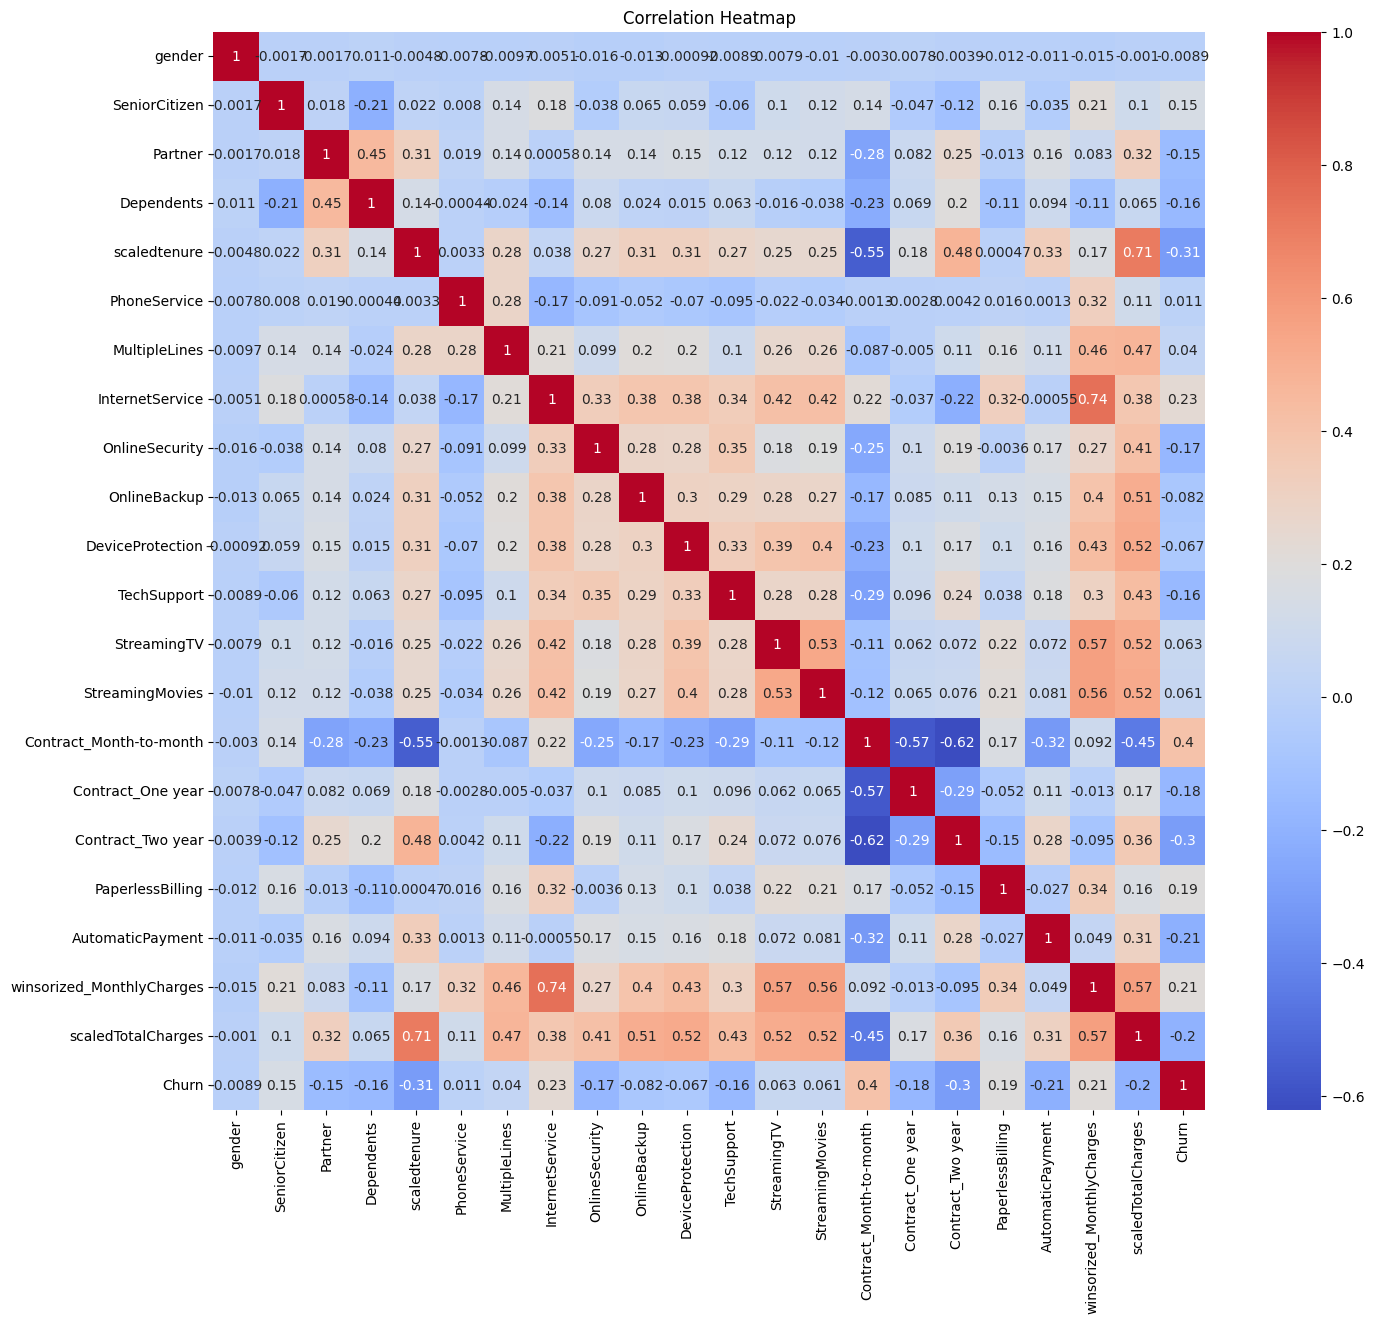

In [54]:
# plt.tight_layout()
plt.figure(figsize=(16, 14))
correlation_matrix = df_cleansed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [55]:
#import everything we need for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
#get features for training the logistic regression
feature_list = df_cleansed.columns[:-1]
print(feature_list)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'scaledtenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling', 'AutomaticPayment',
       'winsorized_MonthlyCharges', 'scaledTotalCharges'],
      dtype='object')


In [57]:
y = df_cleansed['Churn']
X = df_cleansed[feature_list]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=1234)

In [59]:
print(X_train.shape)
print(X_test.shape)

(4704, 21)
(2318, 21)


In [60]:
#Create dif hyperparam for regularization
Cs = [5**i for i in range(-10,10)]
Cs

[1.024e-07,
 5.12e-07,
 2.56e-06,
 1.28e-05,
 6.4e-05,
 0.00032,
 0.0016,
 0.008,
 0.04,
 0.2,
 1,
 5,
 25,
 125,
 625,
 3125,
 15625,
 78125,
 390625,
 1953125]

In [61]:
#define a function to test dif hyperparams
def train_test_LR(X_train, y_train, X_test, y_test, c=1):

    #Create the  scikit-learn LogisticRegression model
    model = LogisticRegression(C=c)

    #Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    churn_predictions = model.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, churn_predictions)

    #Make predictions on the test data
    probability_predictions = model.predict_proba(X_test)

    #Compute the log loss
    l_loss = log_loss(y_test, probability_predictions)

    #Compute the accuracy score
    acc_score = accuracy_score(y_test, churn_predictions)

    return cm, l_loss, acc_score

In [62]:
cm, l_loss, acc_score = train_test_LR(X_train, y_train, X_test, y_test, c=1)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print log loss and accuracy score
print(f"Log Loss: {l_loss}")
print(f"Accuracy Score: {acc_score}")

Confusion Matrix:
[[1496  173]
 [ 316  333]]
Log Loss: 0.4468422740643953
Accuracy Score: 0.7890422778257118


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
#iterate through each hyperparam value and record performance
loglosses_cs = []
acc_cs = []
for c in Cs:
    cm, ll, acc = train_test_LR(X_train, y_train, X_test, y_test, c=c)
    loglosses_cs.append(ll)
    acc_cs.append(acc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [64]:
for i in range(len(acc_cs)):
  print("c =", Cs[i], "the accuracy score is ", acc_cs[i])

c = 1.024e-07 the accuracy score is  0.7200172562553926
c = 5.12e-07 the accuracy score is  0.7200172562553926
c = 2.56e-06 the accuracy score is  0.7286453839516824
c = 1.28e-05 the accuracy score is  0.7704918032786885
c = 6.4e-05 the accuracy score is  0.7730802415875755
c = 0.00032 the accuracy score is  0.7756686798964625
c = 0.0016 the accuracy score is  0.776962899050906
c = 0.008 the accuracy score is  0.7842968075927523
c = 0.04 the accuracy score is  0.7855910267471958
c = 0.2 the accuracy score is  0.7873166522864539
c = 1 the accuracy score is  0.7890422778257118
c = 5 the accuracy score is  0.7851596203623814
c = 25 the accuracy score is  0.7855910267471958
c = 125 the accuracy score is  0.7868852459016393
c = 625 the accuracy score is  0.7868852459016393
c = 3125 the accuracy score is  0.7851596203623814
c = 15625 the accuracy score is  0.7851596203623814
c = 78125 the accuracy score is  0.7851596203623814
c = 390625 the accuracy score is  0.7851596203623814
c = 1953125 t

In [65]:
# c =0.008 seems like the most optimal option because we get a large improvement from the previous hyperparam
# while not risking overfitting as the acc score does not significantly higher

In [66]:
# evalutation metrics for logistic regression

In [67]:
# data visualization for logsistic regression

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [69]:
#create train and test tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
#function that trains a random forest on dif max depth values
def train_test_RF(X_train, y_train, X_test, y_test, maximum_depth):
  #create a model
  model = RandomForestClassifier(n_estimators=100, max_depth=maximum_depth, random_state=42)
  #fit training data
  model.fit(X_train, y_train)
  #predict the test labels
  y_pred = model.predict(X_test)

  #calculate acc score
  accuracy = accuracy_score(y_test, y_pred)
  #calculate precision
  precision = precision_score(y_test, y_pred)
  #calculate recall
  recall = recall_score(y_test, y_pred)
  #calculate f1
  f1 = f1_score(y_test, y_pred)
  # Calculate ROC AUC
  roc_auc = roc_auc_score(y_test, y_pred)
  # Generate Confusion Matrix
  confusion = confusion_matrix(y_test, y_pred)

  print(f"Maximum depth parameter is: {maximum_depth}")
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1-Score: {f1}")
  print(f"ROC AUC: {roc_auc}")
  # Plot the confusion matrix as a heatmap
  plt.figure(figsize=(4, 3))
  sns.set(font_scale=0.5)
  sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Maximum depth parameter is: 2
Accuracy: 0.7295373665480427
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5


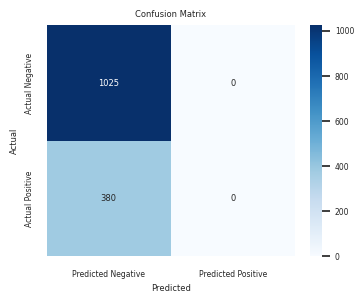

Maximum depth parameter is: 10
Accuracy: 0.7957295373665481
Precision: 0.6754716981132075
Recall: 0.4710526315789474
F1-Score: 0.5550387596899226
ROC AUC: 0.6935750962772786


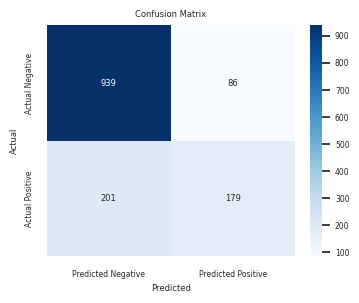

Maximum depth parameter is: 20
Accuracy: 0.7829181494661922
Precision: 0.6344086021505376
Recall: 0.46578947368421053
F1-Score: 0.5371775417298938
ROC AUC: 0.6831386392811297


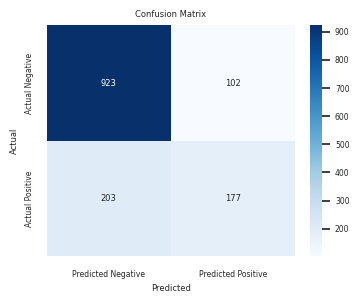

Maximum depth parameter is: 40
Accuracy: 0.7850533807829182
Precision: 0.6423357664233577
Recall: 0.4631578947368421
F1-Score: 0.5382262996941896
ROC AUC: 0.6837740693196407


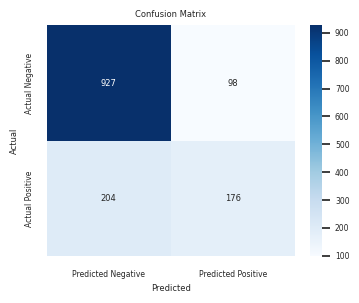

In [71]:
# hyperparam range for max depth
max_depths = [2, 10, 20, 40]

#test the hyperparam
for maximum_depth in max_depths:
  train_test_RF(X_train, y_train, X_test, y_test, maximum_depth)

In [72]:
#function that trains a random forest on dif max depth values
def train_test_RF_n_est(X_train, y_train, X_test, y_test, n_est):

  #create a model
  model = RandomForestClassifier(n_estimators=n_est, max_depth=10, random_state=42)
  #fit training data
  model.fit(X_train, y_train)
  #predict the test labels
  y_pred = model.predict(X_test)

  #calculate acc score
  accuracy = accuracy_score(y_test, y_pred)

  print(f"N estimator parameter is: {n_est}")
  print(f"Accuracy: {accuracy}\n")
  return accuracy

In [73]:
#test different number of trees parameter
n_ests = [2, 10, 20, 50, 100, 200, 500, 1000]
n_est_accs = []
for n_est in n_ests:
  n_est_accs.append(train_test_RF_n_est(X_train, y_train, X_test, y_test, n_est))

N estimator parameter is: 2
Accuracy: 0.7743772241992882

N estimator parameter is: 10
Accuracy: 0.7957295373665481

N estimator parameter is: 20
Accuracy: 0.800711743772242

N estimator parameter is: 50
Accuracy: 0.797864768683274

N estimator parameter is: 100
Accuracy: 0.7957295373665481

N estimator parameter is: 200
Accuracy: 0.797153024911032

N estimator parameter is: 500
Accuracy: 0.799288256227758

N estimator parameter is: 1000
Accuracy: 0.800711743772242



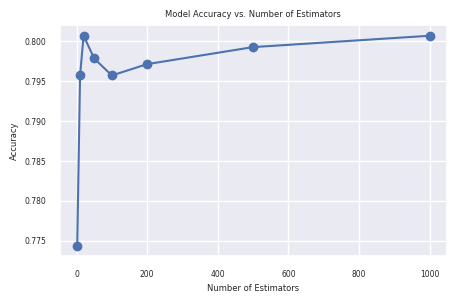

In [74]:
#graph accuracies for dif n estimators(number of trees)
plt.figure(figsize=(5, 3))
plt.plot(n_ests, n_est_accs, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [75]:
# modeling Random Forest using best hyperparameter values
model = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.800711743772242

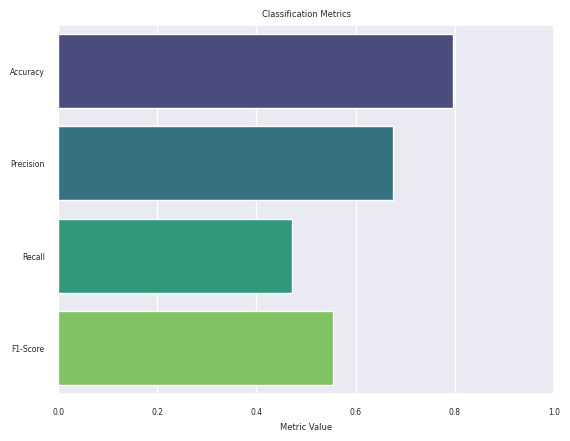

In [76]:
# data visualization for Random Forest
import matplotlib.pyplot as plt
import seaborn as sns

# Sample metric values (replace with actual values)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [0.7957, 0.6755, 0.4711, 0.5550]

# Create a bar chart
sns.barplot(x=values, y=metrics, palette='viridis')
plt.xlabel('Metric Value')
plt.title('Classification Metrics')
plt.xlim(0, 1)
plt.show()


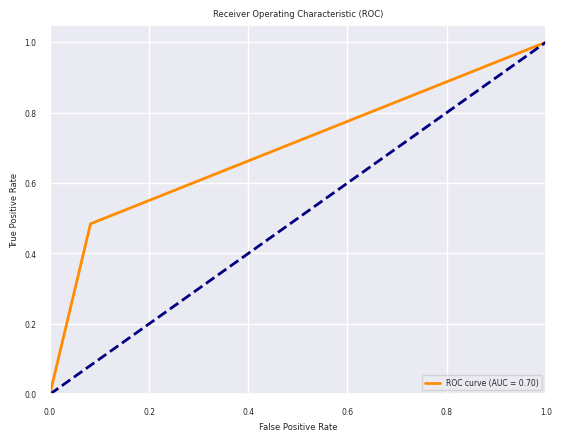

In [77]:
from sklearn.metrics import roc_curve, auc
 # ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Create an ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


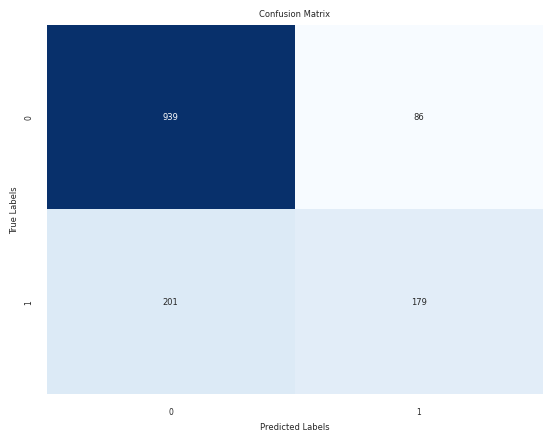

In [78]:
import seaborn as sns

# Sample confusion matrix (replace with actual values)
conf_matrix = [[939, 86], [201, 179]]

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [79]:
# modeling using XGboost

In [80]:
# evalutation metrics for XGboost

In [81]:
# data visualization for XGboost

In [82]:
# modeling using Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)
print('Begin GBDT Implementation...')
gbdt_2_model = GradientBoostingClassifier(n_estimators=50, max_depth=2)

gbdt_2_model.fit(X_train, y_train)

gbdt_2_predictions = gbdt_2_model.predict_proba(X_test)[:, 1].tolist()

gbdt_10_model = GradientBoostingClassifier(n_estimators=50, max_depth=10)


gbdt_10_model.fit(X_train, y_train)

gbdt_10_predictions = gbdt_10_model.predict_proba(X_test)[:, 1].tolist()

print('End')

Begin GBDT Implementation...
End


In [83]:
# evalutation metrics for Gradient Boost
print('Computing ROC Curve...')
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, gbdt_2_predictions)
fpr_10, tpr_10, thresholds_10 = roc_curve(y_test, gbdt_10_predictions)
print('End')

Computing ROC Curve...
End


Plotting ROC Curve...


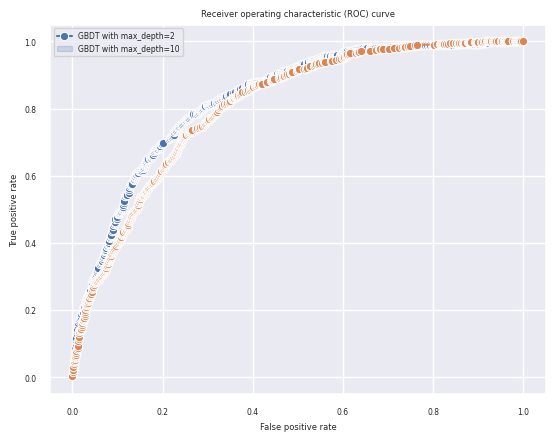

In [84]:
# data visualization for Gradient Boost
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_2, y=tpr_2, marker = 'o')
sns.lineplot(x=fpr_10, y=tpr_10, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['GBDT with max_depth=2', 'GBDT with max_depth=10'])
plt.show()

In [85]:
auc_2 = auc(fpr_2, tpr_2)

print("AUC of the GBDT model with a max depth of 2 is {:.3f}".format(auc_2))

auc_10 = auc(fpr_10, tpr_10)

print("AUC of the GBDT model with a max depth of 10 is {:.3f}".format(auc_10))

AUC of the GBDT model with a max depth of 2 is 0.830
AUC of the GBDT model with a max depth of 10 is 0.807


In [86]:
# modeling using Adaboost
from sklearn.ensemble import AdaBoostClassifier  # for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


In [87]:
# evalutation metrics for Adaboost

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate Precision
precision = precision_score(y_test, y_pred)

# Calculate Recall
recall = recall_score(y_test, y_pred)

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7907473309608541
Precision: 0.656934306569343
Recall: 0.47368421052631576
F1-Score: 0.5504587155963302
ROC AUC: 0.6909884467265726
Confusion Matrix:
[[931  94]
 [200 180]]


In [88]:
# data visualization for Adaboost


In [89]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'AutomaticPayment', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'scaledtenure', 'winsorized_MonthlyCharges', 'scaledTotalCharges'],
      dtype='object')

In [90]:
# Combine 'Partner' and 'Dependents' into a single feature that indicates if a customer has any family ties.

df['FamilyTies'] = df.apply(lambda row: 'Yes' if row['Partner'] == 1 or row['Dependents'] == 1 else 'No', axis=1)

# Print the DataFrame
print(df[['Partner','Dependents','FamilyTies']].head(20))

    Partner  Dependents FamilyTies
0         1           0        Yes
1         0           0         No
2         0           0         No
3         0           0         No
4         0           0         No
5         0           0         No
6         0           1        Yes
7         0           0         No
8         1           0        Yes
9         0           1        Yes
10        1           1        Yes
11        0           0         No
12        1           0        Yes
13        0           0         No
14        0           0         No
15        1           1        Yes
16        0           0         No
17        0           1        Yes
18        1           1        Yes
19        0           0         No


In [91]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'AutomaticPayment', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'scaledtenure', 'winsorized_MonthlyCharges', 'scaledTotalCharges',
       'FamilyTies'],
      dtype='object')

In [92]:
# Combine the 'Contract' columns into a single feature with the contract names
df['ContractType'] = df[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']].idxmax(axis=1)

# Replace the contract names with 0, 1, and 2
df['ContractType'].replace({
    'Contract_Month-to-month': 0,
    'Contract_One year': 1,
    'Contract_Two year': 2
}, inplace=True)

print(df[['ContractType']])


      ContractType
0                0
1                1
2                0
3                1
4                0
...            ...
7038             1
7039             1
7040             0
7041             0
7042             2

[7022 rows x 1 columns]


In [93]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'AutomaticPayment', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'scaledtenure', 'winsorized_MonthlyCharges', 'scaledTotalCharges',
       'FamilyTies', 'ContractType'],
      dtype='object')

In [94]:
print(df['AutomaticPayment'])

0       0
1       0
2       0
3       1
4       0
       ..
7038    0
7039    1
7040    0
7041    0
7042    1
Name: AutomaticPayment, Length: 7022, dtype: int64
